## Machine Learning and Data Science Project

#### Students:  
m20190784 - **Benedita Pinto Nunes**    
m20191416 - **Diogo Rodrigues Silva**                      
m20191429 - **Miguel Sena e Silva**                

#### Database  
***Group33_LaGoste_Campaign.xlsx*** 

retrieved from  
http://elearning.novaims.unl.pt/moodle/pluginfile.php?file=%2F62270%2Fmod_folder%2Fcontent%2F0%2F201920_Group_Datasets.zip&forcedownload=1  

at 2020/04/01.

#### 0. Imports for this project

In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date

#### 1. Obtaining and pre-processing data

In [386]:
# Obtaining and understanding data
g33 = pd.read_excel(r'Group33_LaGoste_Campaign.xlsx', index_col=0)
g33.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar
Custid,,,,,,,,,,,,,,,,,,,,,
50004110,1975,PhD,Together,90888.0,0,0,2017-04-17,6,85,3,...,0,1,0,0,0,0,0,0,0,0
50004118,1968,Master,Married,84214.0,0,1,2016-07-21,10,532,132,...,5,14,5,0,0,0,0,0,0,0
50004130,1980,Graduation,Married,62537.0,1,1,2015-12-07,73,244,36,...,4,7,7,0,0,0,0,0,0,0
50004142,1976,Basic,Divorced,21462.0,1,0,2015-12-18,53,3,15,...,2,4,7,0,0,0,0,0,0,0
50004146,1985,Master,Together,87743.0,0,0,2017-03-07,93,286,185,...,5,6,1,0,0,0,0,0,0,0


In [387]:
# Column cleanup - all lower letters
print('Prior colunm names: \n',g33.columns)
print()
g33.columns = [col.lower() for col in g33]
print('Current colunm names: \n',g33.columns)
# variables in lower letters too
g33 = g33.applymap(lambda x: x if type(x)!=str else x.lower())

Prior colunm names: 
 Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntSneakers', 'MntTShirts',
       'MntRackets', 'MntWatches', 'MntHats', 'MntPremium_Brand',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp2',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'Complain', 'DepVar'],
      dtype='object')

Current colunm names: 
 Index(['year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'mntsneakers', 'mnttshirts',
       'mntrackets', 'mntwatches', 'mnthats', 'mntpremium_brand',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp2',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'complain', 'depvar'],
      dtype='object')


In [388]:
print('Info for g33:\n')
g33.info()

Info for g33:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 50004110 to 50044102
Data columns (total 26 columns):
year_birth             2500 non-null int64
education              2500 non-null object
marital_status         2500 non-null object
income                 2475 non-null float64
kidhome                2500 non-null int64
teenhome               2500 non-null int64
dt_customer            2500 non-null datetime64[ns]
recency                2500 non-null int64
mntsneakers            2500 non-null int64
mnttshirts             2500 non-null int64
mntrackets             2500 non-null int64
mntwatches             2500 non-null int64
mnthats                2453 non-null float64
mntpremium_brand       2458 non-null float64
numdealspurchases      2500 non-null int64
numwebpurchases        2500 non-null int64
numcatalogpurchases    2500 non-null int64
numstorepurchases      2500 non-null int64
numwebvisitsmonth      2500 non-null int64
acceptedcmp2           2500 non-n

In [389]:
# look for duplicate data
print('Prior shape:\n',g33.shape)
print()
g33.drop_duplicates(inplace= True)
print('Current shape:\n',g33.shape) 

print('\nno duplicates found...')

Prior shape:
 (2500, 26)

Current shape:
 (2500, 26)

no duplicates found...


##### Dealing with NaN

In [390]:
# look for missing values
print('Columns with missing values:\n',g33.columns[g33.isnull().any()])
g33.isnull().sum()

Columns with missing values:
 Index(['income', 'mnthats', 'mntpremium_brand'], dtype='object')


year_birth              0
education               0
marital_status          0
income                 25
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntsneakers             0
mnttshirts              0
mntrackets              0
mntwatches              0
mnthats                47
mntpremium_brand       42
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp2            0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
complain                0
depvar                  0
dtype: int64

Dealing with "income" NaNs by referring to median wages by education category

In [391]:
# parsing income by education category
pv_inc2edu = g33[['income', 'education']].groupby(['education'])
pv_inc2edu.describe()

income                                                         \
             count          mean           std     min       25%      50%   
education                                                                   
2n cycle     437.0  62090.132723  25053.341093  4063.0  41788.00  63414.0   
basic        316.0  50429.746835  30455.854111  4933.0  26131.50  42973.0   
graduation  1229.0  64649.281530  26040.481159  1231.0  44596.00  63816.0   
master       325.0  67176.141538  24973.640873  6244.0  47562.00  66406.0   
phd          168.0  69505.339286  25771.604658  5643.0  48480.75  68710.0   

                                
                 75%       max  
education                       
2n cycle    81531.00  123230.0  
basic       73912.00  171472.0  
graduation  84618.00  163153.0  
master      86363.00  150997.0  
phd         89612.25  139909.0

In [392]:
# Defining median income by education category
_income = pv_inc2edu.apply(np.nanmedian).astype(int)
_income

education
2n cycle      63414
basic         42973
graduation    63816
master        66406
phd           68710
dtype: int32

In [393]:
# replacing income NaNs with median income by education category
# merging median income on rows with NaN income
nan_income = g33[g33['income'].isnull()].merge(_income.rename('edu_median'),
                                               left_on = 'education',
                                               right_index = True)
# replacing NaN
nan_income['income'] = nan_income['edu_median']
# drop 'edu_median' column
nan_income.drop('edu_median', axis=1, inplace= True)  
# replace income's NaN rows with edited rows
g33 = pd.concat([g33[g33['income'].notnull()],nan_income])

Dealing with "mnthats" NaNs

The vast majority doesn't spend money on hats.


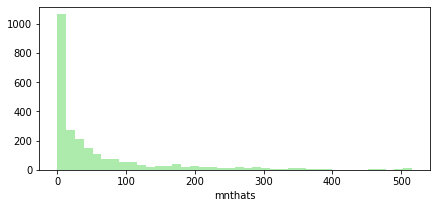

In [394]:
# understanding mnthats - "Amount spent on Hats"
plt.figure(figsize=(7,3))
sns.distplot(a = g33['mnthats'], kde = False, color="limegreen", bins = 40);
print('The vast majority doesn\'t spend money on hats.')

In [396]:
print('No strong relation between spending amounts or between spending amounts and depvar found.')
g33_spent = g33[['mntsneakers', 'mnttshirts', 'mntrackets', 
                 'mntwatches', 'mnthats', 'mntpremium_brand', 'depvar']]
g33_spent.corr()

No strong relation between spending amounts or between spending amounts and depvar found.


,mntsneakers,mnttshirts,mntrackets,mntwatches,mnthats,mntpremium_brand,depvar
mntsneakers,1.000000,0.451350,0.648474,0.435908,0.318082,0.271033,0.234624
mnttshirts,0.451350,1.000000,0.575968,0.577653,0.445122,0.282099,0.098115
mntrackets,0.648474,0.575968,1.000000,0.606484,0.465732,0.280117,0.185079
mntwatches,0.435908,0.577653,0.606484,1.000000,0.451596,0.282672,0.098326
mnthats,0.318082,0.445122,0.465732,0.451596,1.000000,0.443106,0.083023
mntpremium_brand,0.271033,0.282099,0.280117,0.282672,0.443106,1.000000,0.136714
depvar,0.234624,0.098115,0.185079,0.098326,0.083023,0.136714,1.000000


In [397]:
# => replacing mnthats' NaN with the mode (0)
g33['mnthats'].fillna(0, inplace = True)

Dealing with "mntpremium_brand" NaNs

The vast majority doesn't spend money on premium material.


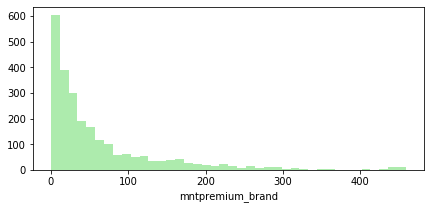

In [398]:
# understanding mntpremium_brand - "Amount spent on premium material"
plt.figure(figsize=(7,3))
sns.distplot(a = g33['mntpremium_brand'], kde = False, color="limegreen", bins = 40);
print('The vast majority doesn\'t spend money on premium material.')

In [399]:
# => replacing NaN with the mode (0)
g33['mntpremium_brand'].fillna(0, inplace = True)

In [400]:
# look for missing values
print('Columns with missing values:\n',g33.columns[g33.isnull().any()])
print('No missing values.')

Columns with missing values:
 Index([], dtype='object')
No missing values.


#### Exploratory Data Analysis

In [401]:
# Data Transformations
# get customer's age
g33['age'] = date.today().year - g33['year_birth']
# get customer's years as client
g33['customeryears'] = g33['dt_customer'].apply(lambda x: date.today().year - x.year)
# get customer's total dependents
g33['dependents'] = g33['kidhome'] + g33['teenhome']
# simplify marital status
g33['marital_status'].replace('together','married', inplace = True)
# simplify education status
g33['high_edu'] = np.where((g33['education']=='graduation')|
                           (g33['education']=='master')|
                           (g33['education']=='phd'),1,0)
# total number of campaigns previously accepted
g33['acceptedc'] = g33['acceptedcmp1']+g33['acceptedcmp2']+g33['acceptedcmp3']+g33['acceptedcmp4']+g33['acceptedcmp5']
# total amount previously spent
g33['mnt'] = g33['mntsneakers']+g33['mntrackets']+g33['mnttshirts']+g33['mntwatches']+g33['mnthats']+g33['mntpremium_brand']
# for palette use
g33['cdepvar'] = g33['depvar'].apply(lambda x: 'sale' if x == 1 else 'nosale')
g33.describe()

,year_birth,income,kidhome,teenhome,recency,mntsneakers,mnttshirts,mntrackets,mntwatches,mnthats,...,acceptedcmp5,acceptedcmp1,complain,depvar,age,customeryears,dependents,high_edu,acceptedc,mnt
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1971.678400,63032.769200,0.455200,0.499600,49.630000,297.068400,39.430000,253.630400,24.434800,58.066400,...,0.066800,0.011200,0.013200,0.124400,48.321600,3.974000,0.954800,0.696800,0.314400,733.038000
std,11.848001,26683.235726,0.541951,0.541588,29.153323,330.496122,58.628771,330.887289,35.885786,92.446757,...,0.249725,0.105257,0.114153,0.330103,11.848001,0.682869,0.753249,0.459733,0.687417,734.852231
min,1944.000000,1231.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000,0.000000,0.000000,0.000000,7.000000
25%,1962.000000,42662.250000,0.000000,0.000000,24.000000,23.750000,3.000000,24.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,39.000000,4.000000,0.000000,0.000000,0.000000,89.000000
50%,1973.000000,62662.500000,0.000000,0.000000,50.000000,167.000000,12.000000,95.000000,8.000000,18.000000,...,0.000000,0.000000,0.000000,0.000000,47.000000,4.000000,1.000000,1.000000,0.000000,460.500000
75%,1981.000000,83183.750000,1.000000,1.000000,75.250000,490.000000,49.250000,362.250000,30.000000,68.000000,...,0.000000,0.000000,0.000000,0.000000,58.000000,4.000000,1.000000,1.000000,0.000000,1239.500000
max,1999.000000,171472.000000,2.000000,2.000000,99.000000,1493.000000,299.000000,1481.000000,180.000000,516.000000,...,1.000000,1.000000,1.000000,1.000000,76.000000,5.000000,4.000000,1.000000,4.000000,3359.000000


In [402]:
g33.describe(include = ['O'])

,education,marital_status,cdepvar
count,2500,2500,2500
unique,5,4,2
top,graduation,married,nosale
freq,1244,1647,2189


In [405]:
print(g33['cdepvar'].value_counts())
print('\nOverall proportion of sales: {}%'.format(100*
                                                g33['depvar'].where(g33['depvar'] == 1).count()/
                                                g33['depvar'].count()))

nosale    2189
sale       311
Name: cdepvar, dtype: int64

Overall proportion of sales: 12.44%


In [406]:
custom_palette = {}
custom_palette['sale']= 'limegreen'
custom_palette['nosale']= 'silver'

###############################################################

Statistics for 'age' column in g33 data.
count    2500
mean       48
std        11
min        21
25%        39
50%        47
75%        58
max        76
Name: age, dtype: int32


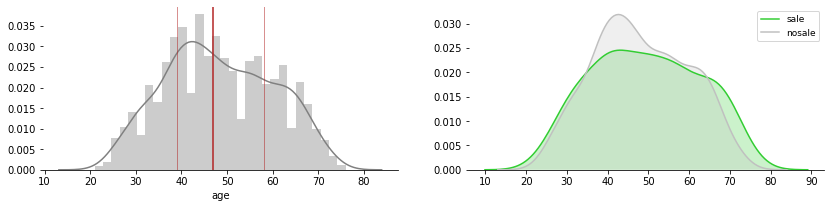

###############################################################

Statistics for 'income' column in g33 data.
count      2500
mean      63032
std       26683
min        1231
25%       42662
50%       62662
75%       83183
max      171472
Name: income, dtype: int32


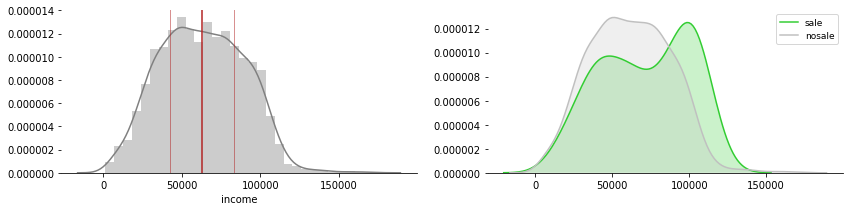

###############################################################

Statistics for 'mnt' column in g33 data.
count    2500
mean      733
std       734
min         7
25%        89
50%       460
75%      1239
max      3359
Name: mnt, dtype: int32


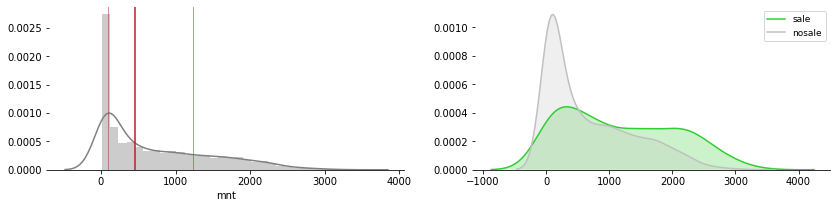

###############################################################

Statistics for 'numwebpurchases' column in g33 data.
count    2500
mean        8
std         3
min         0
25%         6
50%         8
75%        10
max        30
Name: numwebpurchases, dtype: int32


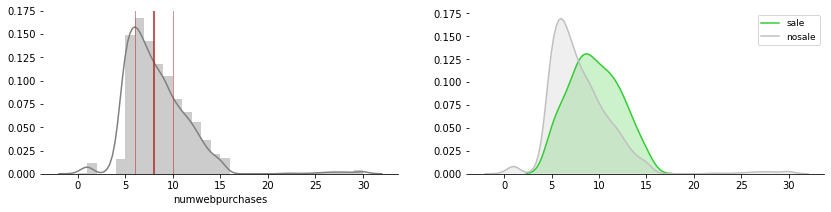

In [407]:
for col in ['age','income', 'mnt','numwebpurchases']:
    print('###############################################################\n')
    fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize= (14,3))
    print(f'Statistics for \'{col}\' column in g33 data.')
    print(g33.loc[:,col].describe().astype(int))
    plt.subplot(1,2,1)
    #plt.figure(figsize=(7,3))
    sns.distplot(g33.loc[:,col], bins = 30, color = 'grey');
    plt.axvline(g33.loc[:,col].quantile(0.25), 0,1, color = 'firebrick', lw = 1, alpha =0.5);
    plt.axvline(g33.loc[:,col].quantile(0.5), 0,1, color = 'firebrick', lw = 2, alpha =0.75);
    plt.axvline(g33.loc[:,col].quantile(0.75), 0,1, color = 'firebrick', lw = 1, alpha =0.5);
    plt.subplot(1,2,2)
    sns.kdeplot(g33.loc[g33['cdepvar'] == 'sale'][col], shade = True, color = custom_palette['sale'], label = 'sale');
    sns.kdeplot(g33.loc[g33['cdepvar'] == 'nosale'][col], shade = True, color = custom_palette['nosale'], label = 'nosale');
    sns.despine(left = True)
    plt.legend(fontsize= 9)            
    plt.show()

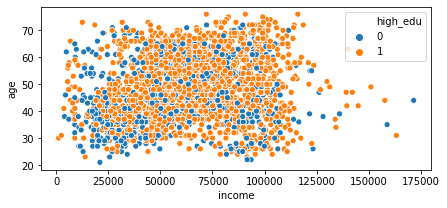

In [408]:
plt.figure(figsize=(7,3))
sns.scatterplot(x = 'income', y = 'age',hue = 'high_edu', data = g33);

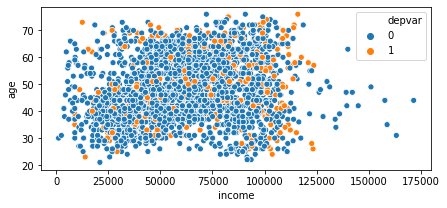

In [409]:
plt.figure(figsize=(7,3))
sns.scatterplot(x = 'income', y = 'age',hue = 'depvar', data = g33);

###############################################################



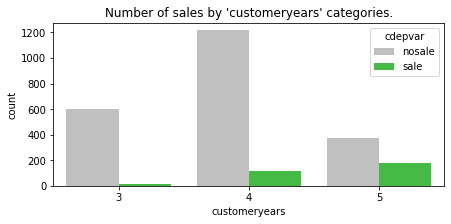

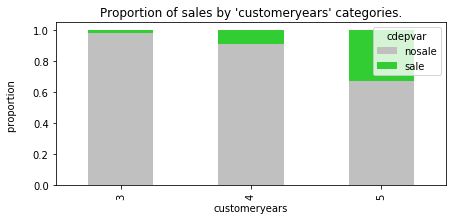

cdepvar        nosale   sale
customeryears               
3               0.979  0.021
4               0.911  0.089
5               0.673  0.327
###############################################################



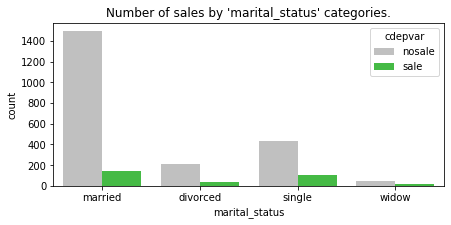

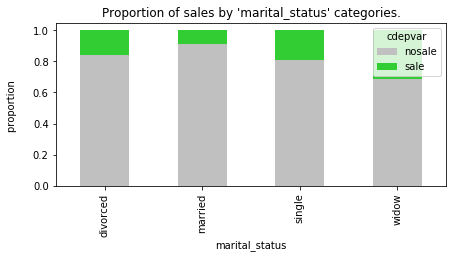

cdepvar         nosale   sale
marital_status               
divorced         0.838  0.162
married          0.910  0.090
single           0.811  0.189
widow            0.687  0.313
###############################################################



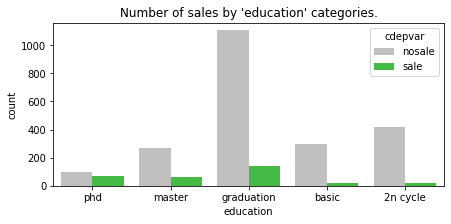

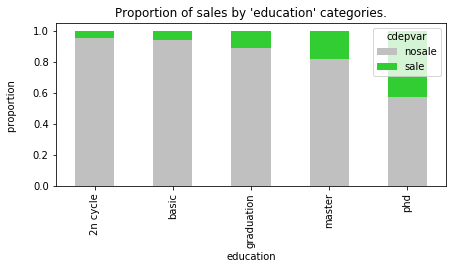

cdepvar     nosale   sale
education                
2n cycle     0.952  0.048
basic        0.940  0.060
graduation   0.888  0.112
master       0.817  0.183
phd          0.576  0.424
###############################################################



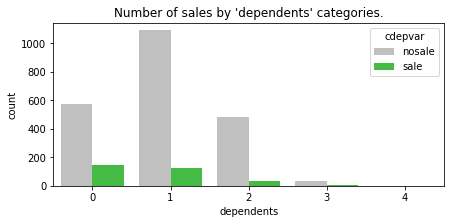

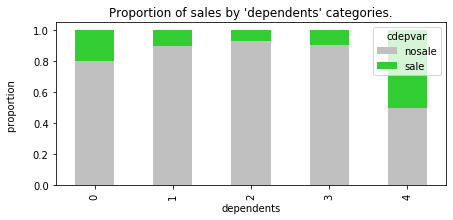

cdepvar     nosale   sale
dependents               
0            0.800  0.200
1            0.896  0.104
2            0.933  0.067
3            0.902  0.098
4            0.500  0.500


In [410]:
for col in ['customeryears','marital_status','education', 'dependents']:
    print('###############################################################\n')
        # countplot
    plt.figure(figsize=(7,3))
    ax = sns.countplot(x = col, hue = 'cdepvar', palette = custom_palette, data = g33);
    ax.set_title(f'Number of sales by \'{col}\' categories.')
    # stacked100%
    cross = np.round(pd.crosstab(g33.loc[:,col],g33.cdepvar, normalize = 'index'),3)
    ax = cross.plot.bar(stacked = True, color = ['silver','limegreen'], figsize = (7,3))
    ax.set_title(f'Proportion of sales by \'{col}\' categories.')
    plt.ylabel("proportion \n") 
    plt.show()
    print(cross)
    

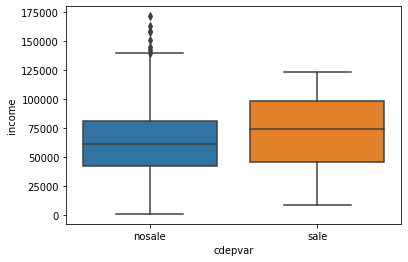

In [411]:
sns.boxplot(x = 'cdepvar', y = 'income', data = g33);

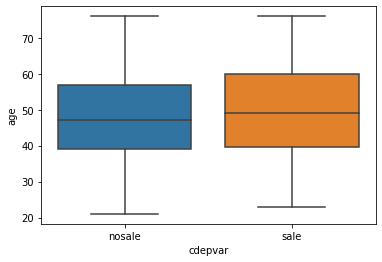

In [412]:
sns.boxplot(x = 'cdepvar', y = 'age', data = g33);

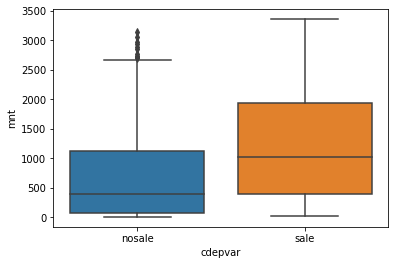

In [413]:
sns.boxplot(x = 'cdepvar', y = 'mnt', data = g33);

sns.pairplot(g33_spent,
            kind = 'scatter',
            diag_kind = 'kde',
            hue = 'cdepvar',
            palette = custom_palette)
plt.show()

## Segmentation Project
#### Objective
Identify actionable segments within the company’s Customer base.
A priori, two visions are considered important (but other prespectives will be valued):
 - __the customer value segmentation:__   
 includes variables such as `Age`, `Income`, `Dt_Customer`, `recency`, `high_edu` or `mnt`.
 - __the product usage segmentation:__  
  includes variables such as the amount spent on `Sneakers`, `Rackets`, `Tshirts`, `Watches`, `Hats`, or `Premium Brands`.
Another possible prespective on segmentation is 
 - __the channel segmentation:__  
 includes variables such as the number of purchases made through `Catalog`, `Store`, `Web`, the `numwebvisitsmonth`, or with `Discounts`.

In [ ]:
g33_prod = g33[['age','income', 'dt_customer','recency','high_edu','mnt']].copy()
g33_prod